In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Defining the two color maps
party_color_map = {
    'Republican': 'Red',
    'Democratic': 'Blue',
    'Libertarian': 'Yellow',
    'Other': 'Green'
}

region_color_map = {
    'South': 'darkred',
    'Midwest': 'peru',
    'West': 'darkorange',
    'Northeast': 'deepskyblue',
}

In [4]:
inflation_data=pd.read_csv('/content/drive/MyDrive/CP project/Project/Raw Datasets/Inflation_level_Bureau of Labor Statistics Data.csv')
inflation_data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1958,"3,2","3,2","2,8","2,4","2,4","2,1","2,4","2,1","1,7","1,7","1,7","1,7","2,4",NaN,NaN
1,1959,"1,7","1,7","1,7","1,7",2,2,2,2,"2,4","2,7",2,2,2,NaN,NaN
2,1960,2,"2,3",2,2,"1,7","1,7","1,3","1,3",1,1,1,1,"1,3",NaN,NaN
3,1961,1,"0,7","0,7",1,1,1,"1,3","1,3","1,6","1,3","1,3","1,3","1,3",NaN,NaN
4,1962,"1,3","1,3","1,6","1,3","1,6","1,6","1,3","1,3","1,3","1,3","1,3","1,3","1,3",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,"2,3","2,4","2,1","1,4","1,2","1,2","1,6","1,7","1,7","1,6","1,6","1,6","1,7","1,8","1,6"
63,2021,"1,4","1,3","1,6",3,"3,8","4,5","4,3",4,4,"4,6","4,9","5,5","3,6","2,6","4,5"
64,2022,6,"6,4","6,5","6,2",6,"5,9","5,9","6,3","6,6","6,3",6,"5,7","6,2","6,2","6,1"
65,2023,"5,6","5,5","5,6","5,5","5,3","4,8","4,7","4,3","4,1",4,4,"3,9","4,8","5,4","4,2"


In [5]:
inflation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    67 non-null     int64 
 1   Jan     67 non-null     object
 2   Feb     67 non-null     object
 3   Mar     67 non-null     object
 4   Apr     67 non-null     object
 5   May     67 non-null     object
 6   Jun     67 non-null     object
 7   Jul     67 non-null     object
 8   Aug     67 non-null     object
 9   Sep     67 non-null     object
 10  Oct     67 non-null     object
 11  Nov     66 non-null     object
 12  Dec     66 non-null     object
 13  Annual  67 non-null     object
 14  HALF1   40 non-null     object
 15  HALF2   39 non-null     object
dtypes: int64(1), object(15)
memory usage: 8.5+ KB


In [6]:
# Convert the columns from objects to floats
columns_to_convert = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']
for column in columns_to_convert:
    inflation_data[column] = inflation_data[column].str.replace(',', '.').astype(float)

In [7]:
election_data=pd.read_csv('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/Election Dataset Cleaned.csv')
election_data

,Year,Voting-age Population (VAP),Turnout,VAP Turnout,President,President's Party,Mandate Years,Democratic,Libertarian,Other,Republican
0,1932,75768000,39816522,52.6,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
1,1936,80174000,45646817,56.9,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
2,1940,84728000,49815312,58.8,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
3,1944,85654000,48025684,56.1,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
4,1948,95573000,48833680,51.1,Harry S. Truman,Democratic,1945/1953,NaN,NaN,NaN,NaN
5,1952,99929000,61551919,61.6,Dwight D. Eisenhower,Republican,1953/1961,NaN,NaN,NaN,NaN
6,1956,104515000,62027040,59.3,Dwight D. Eisenhower,Republican,1953/1961,NaN,NaN,NaN,NaN
7,1960,109672000,68836385,62.8,John F. Kennedy,Democratic,1961/1963,NaN,NaN,NaN,NaN
8,1964,114090000,70097935,61.4,Lyndon B. Johnson,Democratic,1963/1969,NaN,NaN,NaN,NaN
9,1968,120285000,73026831,60.7,Richard Nixon,Republican,1969/1974,NaN,NaN,NaN,NaN


In [8]:
# We want to merge the two data sets based on the 'Year' column and include the president in charge during that year.

def get_president_and_party_for_year(year):
    for index, row in election_data.iterrows():
        mandate_years = row['Mandate Years'].strip()

        if mandate_years == 'TBD':  # Handle the 'TBD' case for 2024
            return row['President'], row['President\'s Party']

        mandate_years = mandate_years.split('/')
        start_year = int(mandate_years[0])

        if mandate_years[1].strip() == 'Present': # Need to handle 2021/Present row
            end_year = 2024
        else:
            end_year = int(mandate_years[1])

        if start_year <= year <= end_year:
            return row['President'], row['President\'s Party']

    return None, None  # In case no match is found

# We need to apply the President's party to each row, and not only the row of the election
inflation_data[['President', "President's Party"]] = inflation_data['Year'].apply(lambda year: pd.Series(get_president_and_party_for_year(year)))

display(inflation_data)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2,President,President's Party
0,1958,3.2,3.2,2.8,2.4,2.4,2.1,2.4,2.1,1.7,1.7,1.7,1.7,2.4,NaN,NaN,Dwight D. Eisenhower,Republican
1,1959,1.7,1.7,1.7,1.7,2.0,2.0,2.0,2.0,2.4,2.7,2.0,2.0,2.0,NaN,NaN,Dwight D. Eisenhower,Republican
2,1960,2.0,2.3,2.0,2.0,1.7,1.7,1.3,1.3,1.0,1.0,1.0,1.0,1.3,NaN,NaN,Dwight D. Eisenhower,Republican
3,1961,1.0,0.7,0.7,1.0,1.0,1.0,1.3,1.3,1.6,1.3,1.3,1.3,1.3,NaN,NaN,Dwight D. Eisenhower,Republican
4,1962,1.3,1.3,1.6,1.3,1.6,1.6,1.3,1.3,1.3,1.3,1.3,1.3,1.3,NaN,NaN,John F. Kennedy,Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6,1.7,"1,8","1,6",Donald Trump,Republican
63,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5,3.6,"2,6","4,5",Donald Trump,Republican
64,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7,6.2,"6,2","6,1",Joe Biden,Democratic
65,2023,5.6,5.5,5.6,5.5,5.3,4.8,4.7,4.3,4.1,4.0,4.0,3.9,4.8,"5,4","4,2",Joe Biden,Democratic


In [9]:
inflation_data.drop(['HALF1','HALF2'],inplace=True,axis=1)
inflation_data.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,President,President's Party
62,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6,1.7,Donald Trump,Republican
63,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5,3.6,Donald Trump,Republican
64,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7,6.2,Joe Biden,Democratic
65,2023,5.6,5.5,5.6,5.5,5.3,4.8,4.7,4.3,4.1,4.0,4.0,3.9,4.8,Joe Biden,Democratic
66,2024,3.9,3.8,3.8,3.6,3.4,3.3,3.2,3.2,3.3,3.3,NaN,NaN,3.5,Joe Biden,Democratic


In [10]:
mean_dem_inf=inflation_data[inflation_data["President's Party"]=='Democratic']['Annual'].mean()
mean_rep_inf=inflation_data[inflation_data["President's Party"]=='Republican']['Annual'].mean()
print("Mean Inflation level during Democratic Presidency :", mean_dem_inf)
print("Mean Inflation level during Republican Presidency :", mean_rep_inf)


Mean Inflation level during Democratic Presidency : 3.65625
Mean Inflation level during Republican Presidency : 3.6942857142857144


In [11]:
inflation_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,President,President's Party
0,1958,3.2,3.2,2.8,2.4,2.4,2.1,2.4,2.1,1.7,1.7,1.7,1.7,2.4,Dwight D. Eisenhower,Republican
1,1959,1.7,1.7,1.7,1.7,2.0,2.0,2.0,2.0,2.4,2.7,2.0,2.0,2.0,Dwight D. Eisenhower,Republican
2,1960,2.0,2.3,2.0,2.0,1.7,1.7,1.3,1.3,1.0,1.0,1.0,1.0,1.3,Dwight D. Eisenhower,Republican
3,1961,1.0,0.7,0.7,1.0,1.0,1.0,1.3,1.3,1.6,1.3,1.3,1.3,1.3,Dwight D. Eisenhower,Republican
4,1962,1.3,1.3,1.6,1.3,1.6,1.6,1.3,1.3,1.3,1.3,1.3,1.3,1.3,John F. Kennedy,Democratic


In [12]:
# Maybe the Monthlty coversion is not necessary
# Convert the monthly inflation data into numeric values (replace commas with dots and convert to float)
inflation_data_monthly = inflation_data.set_index('Year').filter(regex='^Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec')
inflation_data_monthly = inflation_data_monthly.replace({',': '.'}, regex=True).astype(float)
# This step ensures that only the columns corresponding to each month of the year (January, February, March, etc.) are retained.
display(inflation_data_monthly)
display(inflation_data_monthly.info())

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1958,3.2,3.2,2.8,2.4,2.4,2.1,2.4,2.1,1.7,1.7,1.7,1.7
1959,1.7,1.7,1.7,1.7,2.0,2.0,2.0,2.0,2.4,2.7,2.0,2.0
1960,2.0,2.3,2.0,2.0,1.7,1.7,1.3,1.3,1.0,1.0,1.0,1.0
1961,1.0,0.7,0.7,1.0,1.0,1.0,1.3,1.3,1.6,1.3,1.3,1.3
1962,1.3,1.3,1.6,1.3,1.6,1.6,1.3,1.3,1.3,1.3,1.3,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6
2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5
2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7


<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 1958 to 2024
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     67 non-null     float64
 1   Feb     67 non-null     float64
 2   Mar     67 non-null     float64
 3   Apr     67 non-null     float64
 4   May     67 non-null     float64
 5   Jun     67 non-null     float64
 6   Jul     67 non-null     float64
 7   Aug     67 non-null     float64
 8   Sep     67 non-null     float64
 9   Oct     67 non-null     float64
 10  Nov     66 non-null     float64
 11  Dec     66 non-null     float64
dtypes: float64(12)
memory usage: 6.8 KB


None

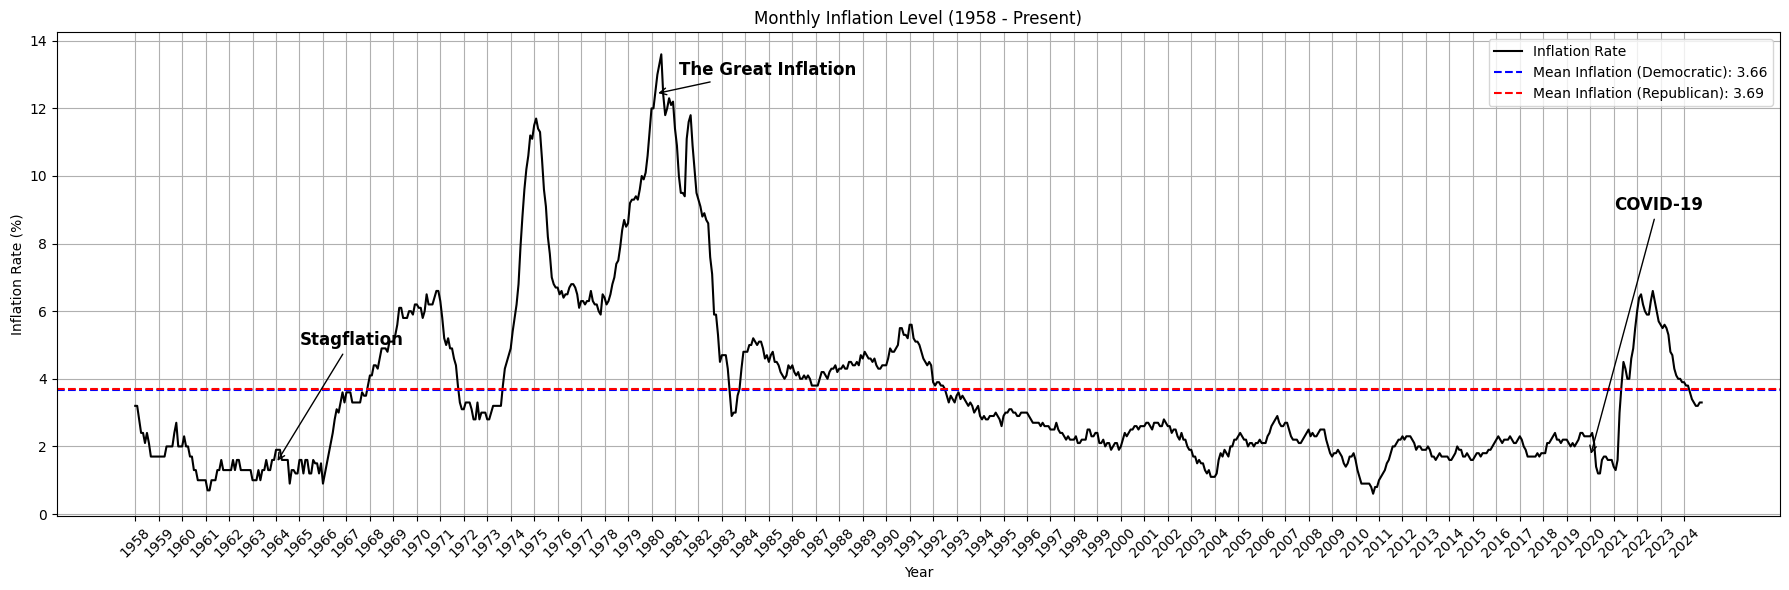

In [13]:
years = inflation_data_monthly.index.tolist()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dates = [f"{year}-{month}" for year in years for month in months]

inflation_values = inflation_data_monthly.values.flatten()


# Plotting the inflation values
plt.figure(figsize=(18, 6))
plt.plot(dates, inflation_values, color='black', label="Inflation Rate")

# Set x-axis to show years, not individual months
plt.xticks(ticks=range(0, len(dates), 12), labels=years, rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Monthly Inflation Level (1958 - Present)')

plt.axhline(y=mean_dem_inf, color='blue', linestyle='--', label=f'Mean Inflation (Democratic): {mean_dem_inf:.2f}')
plt.axhline(y=mean_rep_inf, color='red', linestyle='--', label=f'Mean Inflation (Republican): {mean_rep_inf:.2f}')

# Annotate key events with arrows and text
plt.annotate(
    'The Great Inflation',
    xy=(dates.index('1980-Mar'), inflation_data_monthly.loc[1980].mean()),
    xytext=(dates.index('1981-Mar'), 13),  # Position of the text annotation
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12, color='black', fontweight='bold'
)

plt.annotate(
    'COVID-19',
    xy=(dates.index('2020-Jan'), inflation_data_monthly.loc[2020].mean()),
    xytext=(dates.index('2021-Jan'), 9),  # Position of the text annotation
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12, color='black', fontweight='bold'
)

plt.annotate(
    'Stagflation',
    xy=(dates.index('1964-Jan'), inflation_data_monthly.loc[1964].mean()),
    xytext=(dates.index('1965-Jan'), 5),  # Position of the text annotation
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12, color='black', fontweight='bold'
)

# Show the plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

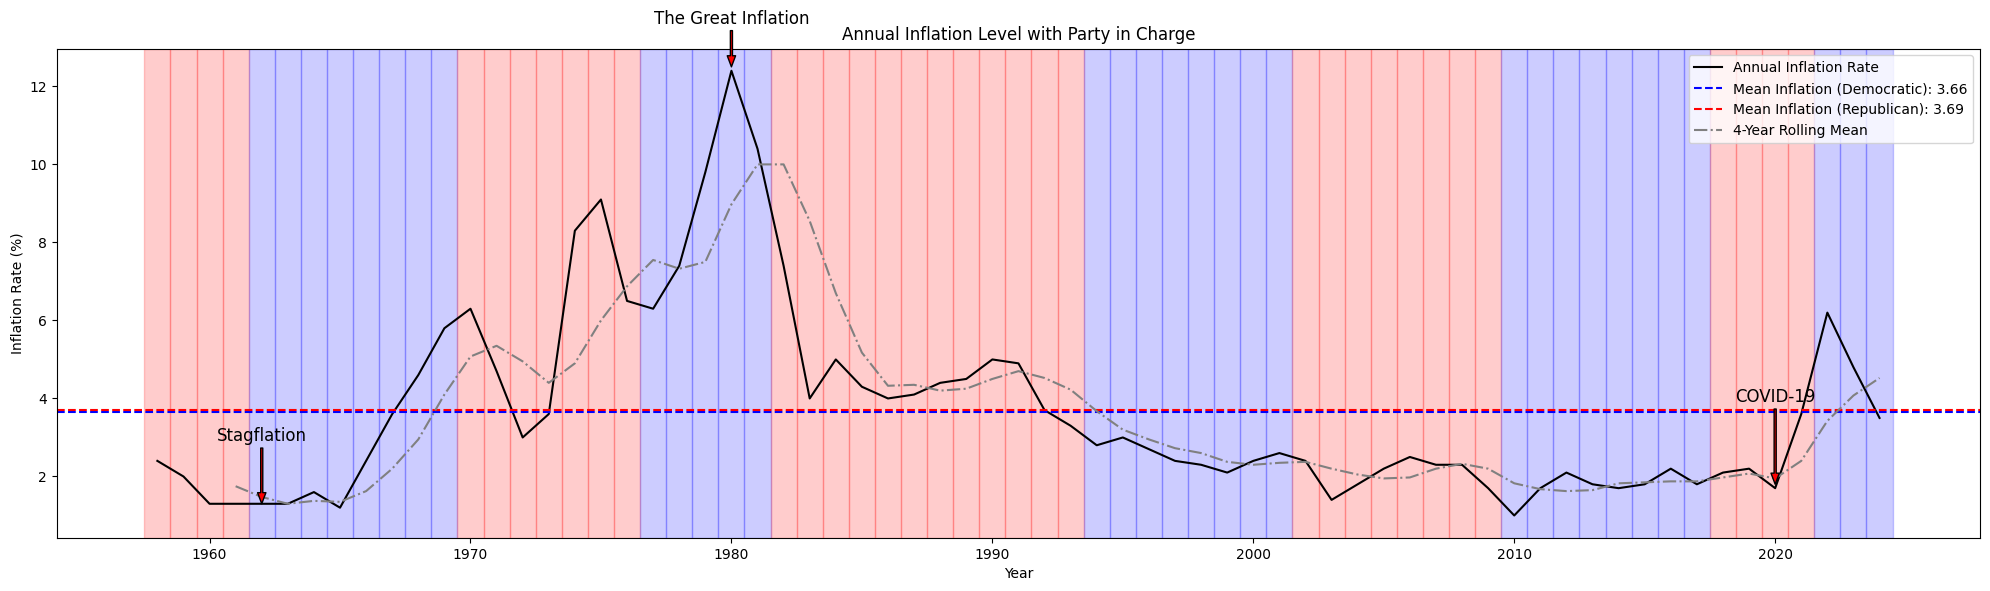

In [14]:
# Time series to view Annaul inflation in usa, highlighting the 4-year mean and the Party in charge during those years
inflation_data['4-Year Rolling Mean'] = inflation_data['Annual'].rolling(window=4).mean()
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(inflation_data['Year'], inflation_data['Annual'], color='black', label="Annual Inflation Rate")

# Highlight presidential terms with shaded areas
for i, row in inflation_data.iterrows():
    color = 'blue' if row["President's Party"] == 'Democratic' else 'red'
    ax.axvspan(row['Year'] - 0.5, row['Year'] + 0.5, color=color, alpha=0.2)

# Add horizontal lines for the mean inflation during Democratic and Republican presidencies and the 4 year mean
ax.axhline(y=mean_dem_inf, color='blue', linestyle='--', label=f'Mean Inflation (Democratic): {mean_dem_inf:.2f}')
ax.axhline(y=mean_rep_inf, color='red', linestyle='--', label=f'Mean Inflation (Republican): {mean_rep_inf:.2f}')
ax.plot(inflation_data['Year'], inflation_data['4-Year Rolling Mean'], color='grey', linestyle='-.', label='4-Year Rolling Mean')

# Highlight key events that significantly influenced changes in the inflation level
crisis_data = [
    (1980, 'The Great Inflation', 12.5, 1.0),
    (2020, 'COVID-19', 1.8, 2),
    (1962, 'Stagflation', 1.3, 1.5)
]

for date, label, y_value, location in crisis_data:
    ax.annotate(
        label,
        xy=(date, y_value),
        xytext=(date, y_value + location),  # Position the text slightly above the point
        arrowprops=dict(facecolor='red', edgecolor='black', width=1.5, headwidth=6, headlength=8),
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=12,
        color='black'
    )
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate (%)')
ax.set_title('Annual Inflation Level with Party in Charge')

ax.legend()
plt.tight_layout()
plt.show()


<ipython-input-15-4e578913730c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="President's Party", y="Annual", data=inflation_data, palette=party_color_map,


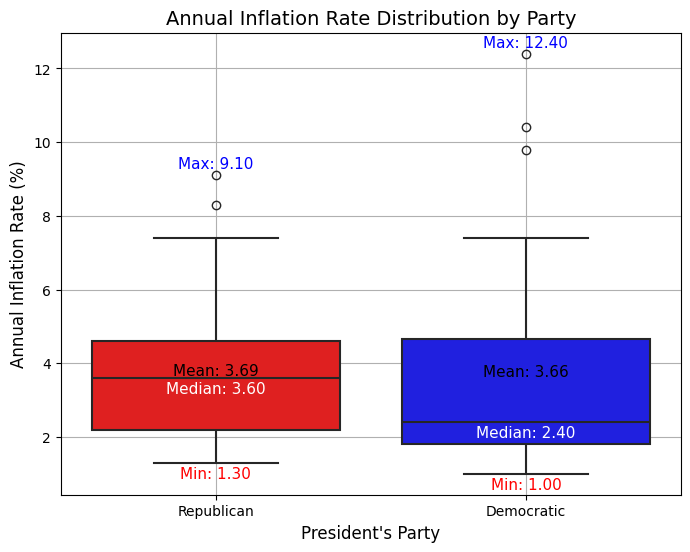

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="President's Party", y="Annual", data=inflation_data, palette=party_color_map,
                 linewidth=1.5, fliersize=6)
plt.grid(True)

# Add mean, median, min, max values to the plot as annotations
statistics = inflation_data.groupby("President's Party")['Annual'].describe()

for party in statistics.index:
    mean_val = statistics.loc[party, 'mean']
    median_val = statistics.loc[party, '50%']
    min_val = statistics.loc[party, 'min']
    max_val = statistics.loc[party, 'max']

    # Add annotations for mean, median, min, max
    ax.text(party, mean_val + 0.1, f'Mean: {mean_val:.2f}', horizontalalignment='center', verticalalignment='center',
            color='black', fontsize=11, ha='center', va='center')

    ax.text(party, median_val - 0.3, f'Median: {median_val:.2f}', horizontalalignment='center', verticalalignment='center',
            color='white', fontsize=11, ha='center', va='center')

    ax.text(party, min_val - 0.3, f'Min: {min_val:.2f}', horizontalalignment='center', verticalalignment='center',
            color='red', fontsize=11, ha='center', va='center')

    ax.text(party, max_val + 0.3, f'Max: {max_val:.2f}', horizontalalignment='center', verticalalignment='center',
            color='blue', fontsize=11, ha='center', va='center')

plt.title("Annual Inflation Rate Distribution by Party", fontsize=14)
plt.xlabel("President's Party", fontsize=12)
plt.ylabel("Annual Inflation Rate (%)", fontsize=12)
plt.show()

In [16]:
inflation_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,President,President's Party,4-Year Rolling Mean
0,1958,3.2,3.2,2.8,2.4,2.4,2.1,2.4,2.1,1.7,1.7,1.7,1.7,2.4,Dwight D. Eisenhower,Republican,NaN
1,1959,1.7,1.7,1.7,1.7,2.0,2.0,2.0,2.0,2.4,2.7,2.0,2.0,2.0,Dwight D. Eisenhower,Republican,NaN
2,1960,2.0,2.3,2.0,2.0,1.7,1.7,1.3,1.3,1.0,1.0,1.0,1.0,1.3,Dwight D. Eisenhower,Republican,NaN
3,1961,1.0,0.7,0.7,1.0,1.0,1.0,1.3,1.3,1.6,1.3,1.3,1.3,1.3,Dwight D. Eisenhower,Republican,1.750
4,1962,1.3,1.3,1.6,1.3,1.6,1.6,1.3,1.3,1.3,1.3,1.3,1.3,1.3,John F. Kennedy,Democratic,1.475


**Inflation and Voting Analysis**

In [17]:
election_data=pd.read_csv('/content/drive/MyDrive/CP project/Project/Cleaned Datasets/Election Dataset Cleaned.csv')
election_data.head()

,Year,Voting-age Population (VAP),Turnout,VAP Turnout,President,President's Party,Mandate Years,Democratic,Libertarian,Other,Republican
0,1932,75768000,39816522,52.6,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
1,1936,80174000,45646817,56.9,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
2,1940,84728000,49815312,58.8,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
3,1944,85654000,48025684,56.1,Franklin D. Roosevelt,Democratic,1933/1945,NaN,NaN,NaN,NaN
4,1948,95573000,48833680,51.1,Harry S. Truman,Democratic,1945/1953,NaN,NaN,NaN,NaN


In [18]:
inflation_data = pd.merge(election_data, inflation_data[['Year', 'Annual']], on='Year',how='right')
inflation_data.head()

,Year,Voting-age Population (VAP),Turnout,VAP Turnout,President,President's Party,Mandate Years,Democratic,Libertarian,Other,Republican,Annual
0,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4
1,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1960,109672000.0,68836385.0,62.8,John F. Kennedy,Democratic,1961/1963,NaN,NaN,NaN,NaN,1.3
3,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3
4,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3


Research Question:
Do voters tend to vote for one party during periods of high or low inflation?

This analysis can provide insights into whether voters align with a particular party when inflation is high or low. To investigate this, we will look at:

 - High Inflation vs Low Inflation periods.
 - Voter Turnout and Election Outcomes for different parties during those periods.
 - Changes in Voting Patterns (e.g., Republican vs Democratic voting trends).

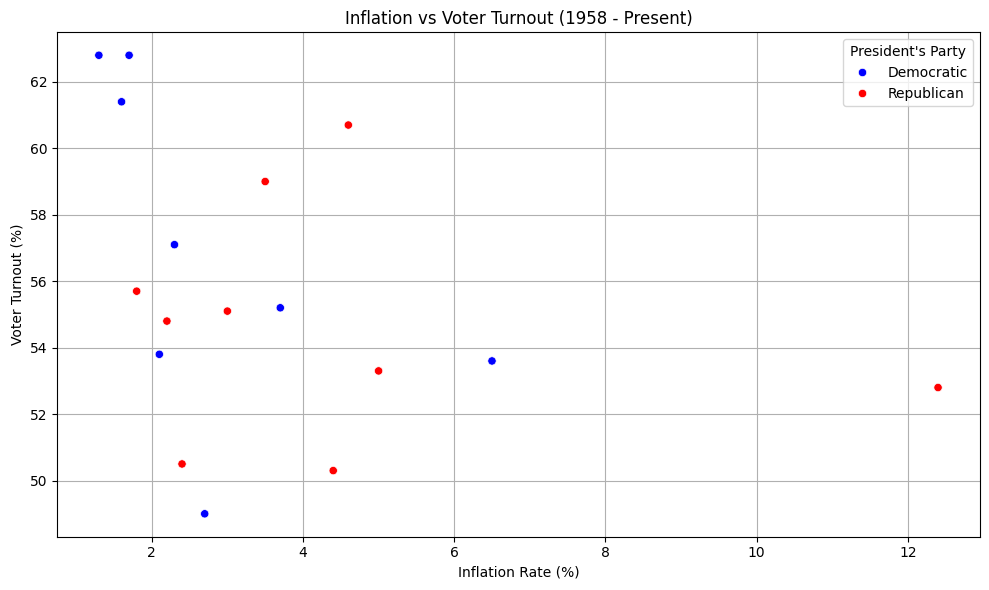

In [19]:
# Plotting inflation against voter turnout
plt.figure(figsize=(10, 6))
sns.scatterplot(data=inflation_data, x='Annual', y='VAP Turnout', hue="President's Party", palette=party_color_map)

# Add titles and labels
plt.title('Inflation vs Voter Turnout (1958 - Present)')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Voter Turnout (%)')
plt.legend(title="President's Party", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()




In [20]:
# Calculate the median inflation rate and create a new variable that defines that year as low or high inflation
median_inflation = inflation_data['Annual'].median()
inflation_data['Inflation Category'] = inflation_data['Annual'].apply(
    lambda x: 'High Inflation' if x > median_inflation else 'Low Inflation'
)
inflation_data.head()

,Year,Voting-age Population (VAP),Turnout,VAP Turnout,President,President's Party,Mandate Years,Democratic,Libertarian,Other,Republican,Annual,Inflation Category
0,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,Low Inflation
1,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Low Inflation
2,1960,109672000.0,68836385.0,62.8,John F. Kennedy,Democratic,1961/1963,NaN,NaN,NaN,NaN,1.3,Low Inflation
3,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,Low Inflation
4,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,Low Inflation


In [21]:
inflation_data['Total Votes'] = inflation_data['Democratic'] + inflation_data['Republican']
vote_share_by_inflation = inflation_data.groupby(['Inflation Category', 'President\'s Party'])['Total Votes'].sum().reset_index()
print(vote_share_by_inflation)


  Inflation Category President's Party  Total Votes
0     High Inflation        Democratic  163206999.0
1     High Inflation        Republican  261099548.0
2      Low Inflation        Democratic  497158917.0
3      Low Inflation        Republican  350279182.0


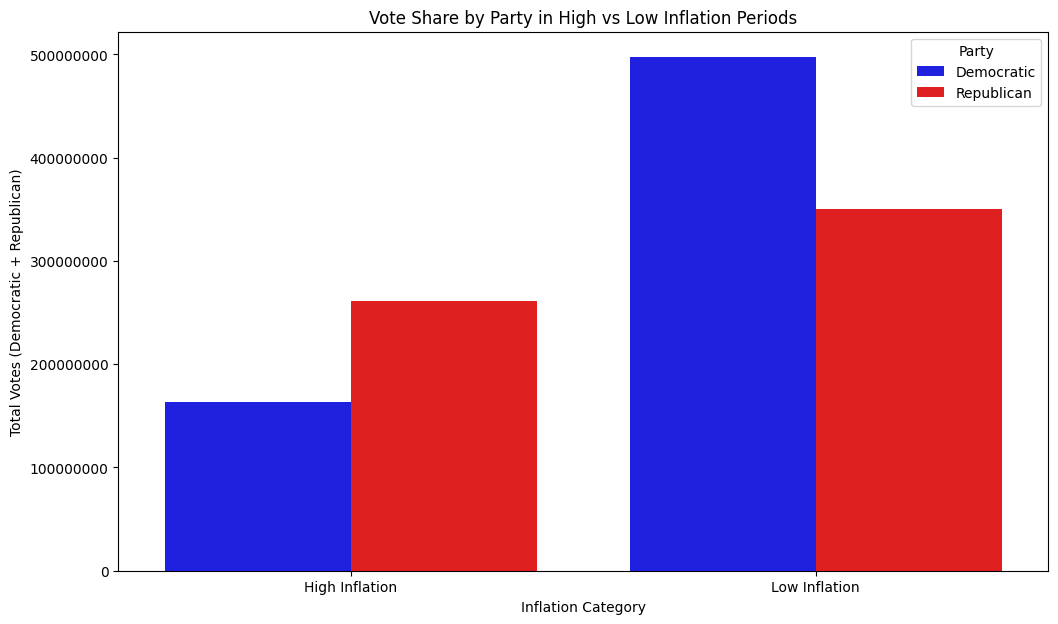

In [22]:
# Create a bar plot to show the total votes for each party during high and low inflation periods
plt.figure(figsize=(12, 7))
sns.barplot(data=vote_share_by_inflation, x='Inflation Category', y='Total Votes', hue="President's Party", palette=party_color_map)
plt.title('Vote Share by Party in High vs Low Inflation Periods')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Inflation Category')
plt.ylabel('Total Votes (Democratic + Republican)')
plt.legend(title='Party')
plt.show()

In [24]:
import statsmodels.api as sm

# Creating lagged inflation data
inflation_data['Lag Inflation'] = inflation_data['Annual'].shift(1)

# Drop rows with NaN values from lagged inflation
regression_data = inflation_data.dropna(subset=['Lag Inflation', 'VAP Turnout'])

# Set up the model
X = regression_data[['Lag Inflation']]
y = regression_data['VAP Turnout']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            VAP Turnout   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.387
Date:                Wed, 08 Jan 2025   Prob (F-statistic):              0.257
Time:                        12:45:46   Log-Likelihood:                -47.650
No. Observations:                  17   AIC:                             99.30
Df Residuals:                      15   BIC:                             101.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            57.6159      1.884     30.589

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
